## Load Dataset

In [1]:
import pandas as pd
import re

# Load the dataset
data = pd.read_csv('/home/shantanu/OA/Augnito AI/archive/medical speech transcription and intent/Medical Speech, Transcription, and Intent/overview-of-recordings.csv')

## Data Analysis

In [ ]:
data.head() # exploring dataset

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


In [ ]:
data.isnull().sum() # check for null values

audio_clipping                         0
audio_clipping:confidence              0
background_noise_audible               0
background_noise_audible:confidence    0
overall_quality_of_the_audio           0
quiet_speaker                          0
quiet_speaker:confidence               0
speaker_id                             0
file_download                          0
file_name                              0
phrase                                 0
prompt                                 0
writer_id                              0
dtype: int64

In [ ]:
# Applying text preprocessing

data['phrase'] = data['phrase'].str.lower()  # Convert text to lowercase
data['phrase'] = data['phrase'].apply(lambda x: re.sub(r'[^\w\s]', '', x).strip())  # Remove punctuation and strip whitespace

data[['phrase']].head()

,phrase
0,when i remember her i feel down
1,when i carry heavy things i feel like breaking...
2,there is too much pain when i move my arm
3,my son had his lip pierced and it is swollen a...
4,my muscles in my lower back are aching


In [ ]:
# Setting path for audio files

import os

# Define paths to each folder
train_path = '/home/shantanu/OA/Augnito AI/archive/medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/train'
test_path = '/home/shantanu/OA/Augnito AI/archive/medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test'
validate_path = '/home/shantanu/OA/Augnito AI/archive/medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/validate'

# Get list of files in each folder
train_files = set(os.listdir(train_path))
test_files = set(os.listdir(test_path))
validate_files = set(os.listdir(validate_path))

In [6]:
all_file_names = set(data['file_name'])

In [ ]:
len(train_files)+len(test_files)+len(validate_files) == len(all_file_names) # checking for any missing audio file

True

## Data Visualizations

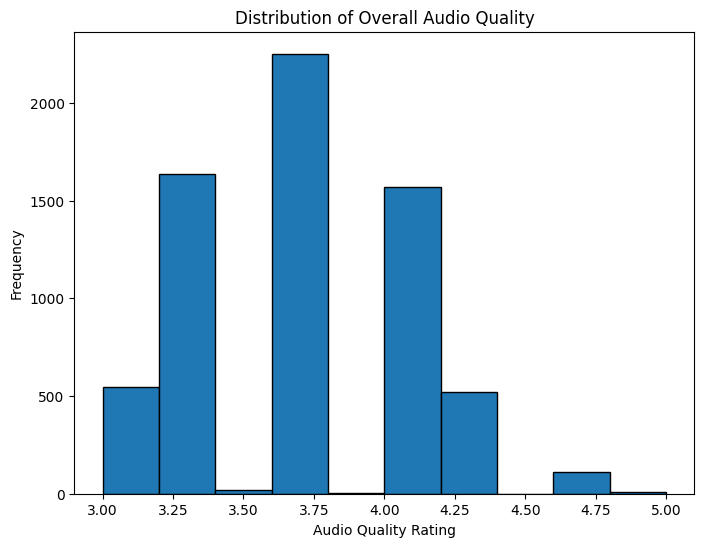

In [8]:
import matplotlib.pyplot as plt

# Plot: Distribution of Overall Audio Quality
plt.figure(figsize=(8, 6))
data['overall_quality_of_the_audio'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Overall Audio Quality')
plt.xlabel('Audio Quality Rating')
plt.ylabel('Frequency')
plt.show()


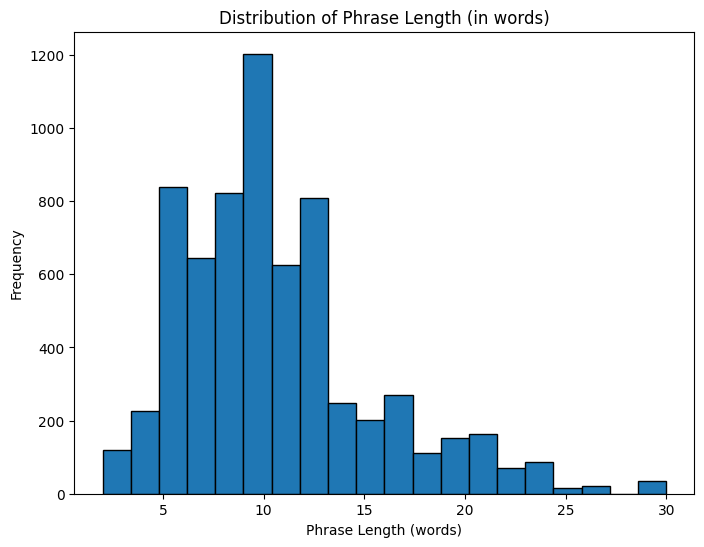

In [9]:
# Calculate phrase length in words
data['phrase_length'] = data['phrase'].apply(lambda x: len(x.split()))

# Plot: Phrase Length Distribution
plt.figure(figsize=(8, 6))
data['phrase_length'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Phrase Length (in words)')
plt.xlabel('Phrase Length (words)')
plt.ylabel('Frequency')
plt.show()


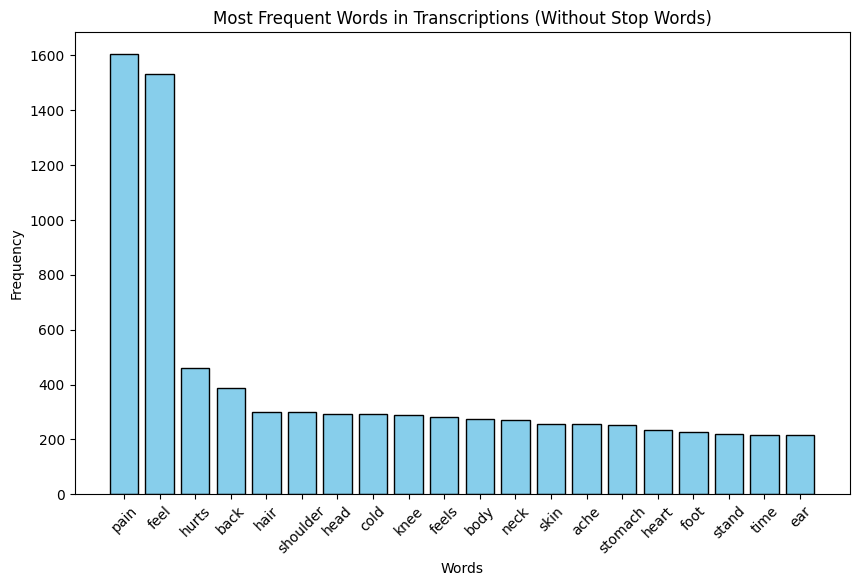

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
import re
from wordcloud import STOPWORDS

# Define custom stop words by adding to the existing STOPWORDS set
stopwords = set(STOPWORDS)
stopwords.update(["your", "specific", "terms", "im", "cant"])  # Add any custom stop words here

# Step 1: Combine all phrases and tokenize
all_words = ' '.join(data['phrase']).lower()  # Combine all phrases into a single string
all_words = re.findall(r'\b\w+\b', all_words)  # Extract words using regex

# Step 2: Filter out stop words
filtered_words = [word for word in all_words if word not in stopwords]

# Step 3: Calculate word frequency
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)  # Adjust the number as needed

# Step 4: Plot the most frequent words
words, counts = zip(*common_words)  # Unzip into separate lists for plotting
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.title('Most Frequent Words in Transcriptions (Without Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


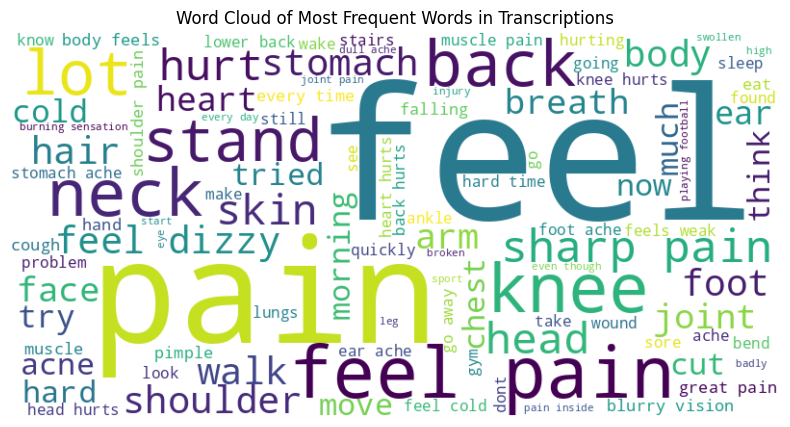

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

# Step 1: Combine all phrases into a single text and clean it
all_text = ' '.join(data['phrase']).lower()  # Combine all phrases into one string
all_text = re.sub(r'[^\w\s]', '', all_text)  # Remove punctuation

# Step 2: Define stop words
stopwords = set(STOPWORDS)
stopwords.update(["your", "specific", "terms", "im", "cant"])  # Add custom stop words here

# Step 3: Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      stopwords=stopwords, max_words=100, colormap='viridis').generate(all_text)

# Step 4: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes for a cleaner look
plt.title('Word Cloud of Most Frequent Words in Transcriptions')
plt.show()


## Re-sampling Data

In [ ]:
import soundfile as sf

file_path = 'Medical Speech, Transcription, and Intent/recordings/test/1249120_1853182_21608484.wav'

# Open the audio file to check the sample rate
with sf.SoundFile(file_path) as f:
    sample_rate = f.samplerate
    print(f"Current sample rate: {sample_rate} Hz")


Setting audio to 160000 Hz

In [ ]:
import os
import librosa
import soundfile as sf

# Define paths to the input folders and output folders for resampled audio
base_input_path = 'Medical Speech, Transcription, and Intent/recordings'
base_output_path = 'Medical Speech, Transcription, and Intent/resampled_audio'

# Ensure the output folder structure mirrors the input folder structure
os.makedirs(os.path.join(base_output_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(base_output_path, 'test'), exist_ok=True)
os.makedirs(os.path.join(base_output_path, 'validate'), exist_ok=True)

# Function to resample and save audio
def resample_audio(input_path, output_path, target_sr=16000):
    # Load the audio file with librosa at the target sample rate
    y, sr = librosa.load(input_path, sr=target_sr)
    # Save the resampled audio to the output path
    sf.write(output_path, y, target_sr)
    print(f"Resampled {input_path} to {target_sr} Hz and saved to {output_path}")

# Process each folder (train, test, validate)
for folder in ['train', 'test', 'validate']:
    input_folder = os.path.join(base_input_path, folder)
    output_folder = os.path.join(base_output_path, folder)
    
    # Loop through each audio file in the folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.wav'):  # Only process .wav files
            input_file_path = os.path.join(input_folder, file_name)
            output_file_path = os.path.join(output_folder, file_name)
            
            # Resample and save the audio file
            resample_audio(input_file_path, output_file_path)


In [ ]:
import soundfile as sf

file_path = 'Medical Speech, Transcription, and Intent/resampled_audio/test/1249120_1853182_21608484.wav'

# Open the audio file to check the sample rate
with sf.SoundFile(file_path) as f:
    sample_rate = f.samplerate
    print(f"Current sample rate: {sample_rate} Hz")


## Loading Whisper Model

In [18]:
import whisper

# Load the Whisper model (choose an appropriate size)
model = whisper.load_model("base")  # Options: tiny, base, small, medium, large


/home/shantanu/anaconda3/envs/augnito/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/shantanu/anaconda3/envs/augnito/lib/python3.10/site-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during 

In [19]:
# Example of running inference with Whisper
audio_file = 'Medical Speech, Transcription, and Intent/recordings/train/1249120_44142156_72079889.wav'
result = model.transcribe(audio_file)
print("Transcription:", result["text"])


/home/shantanu/anaconda3/envs/augnito/lib/python3.10/site-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription:  My face is all broken out with pimples.


## Loading Wav2Vec Model

In [3]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torch
import soundfile as sf

# Load the Wav2Vec2 model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

In [6]:
def transcribe(audio_path):
    # Load audio file
    audio_input, _ = sf.read(audio_path)
    
    # Process the audio input
    inputs = processor(audio_input, sampling_rate=16000, return_tensors="pt", padding=True)
    
    # Run the model and get logits
    with torch.no_grad():
        logits = model(inputs.input_values).logits

    # Decode the predicted ids to text
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.decode(predicted_ids[0])
    return transcription



## NOTE

Fine tuning of whisper is available in Whisper-FineTune.ipynb

Fine tuning of wev2vec is available in Wev2Vec-FineTune.ipynb

Live Demo is available in Whisper-FineTune.ipynb